<a href="https://colab.research.google.com/github/HiteshS37/Python/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using Support Vector Classifier calculate the accuracy score and precision score.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/diabetes (1).csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data.shape

(768, 9)

In [ ]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
x = data.drop(columns = ['Outcome'])
y = data['Outcome']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=5)
display (x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(537, 8)

(537,)

(231, 8)

(231,)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform (x_test)

In [ ]:
# Fitting the Model (SVM) using 'Linear' kernel

model = SVC(kernel= 'linear', random_state=0)
model.fit(x_train, y_train)
svc_prediction = model.predict(x_test)
print('svc_prediction:', svc_prediction)

svc_prediction: [0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1
 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 1]


In [ ]:
conf_mat = metrics.confusion_matrix(y_test, svc_prediction)
print('SVC [kernerl - linear]')
print('Confusion Matrix : \n', conf_mat)
Accuracy_score = metrics.accuracy_score(y_test, svc_prediction)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage : ', int(Accuracy_score*100), '%')
print(classification_report(svc_prediction,y_test))

SVC [kernerl - linear]
Confusion Matrix : 
 [[132  28]
 [ 22  49]]
Accuracy Score :  0.7835497835497836
Accuracy in Percentage :  78 %
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       154
           1       0.69      0.64      0.66        77

    accuracy                           0.78       231
   macro avg       0.76      0.75      0.75       231
weighted avg       0.78      0.78      0.78       231



[Text(0.5, 1.0, 'SVC [linear]')]

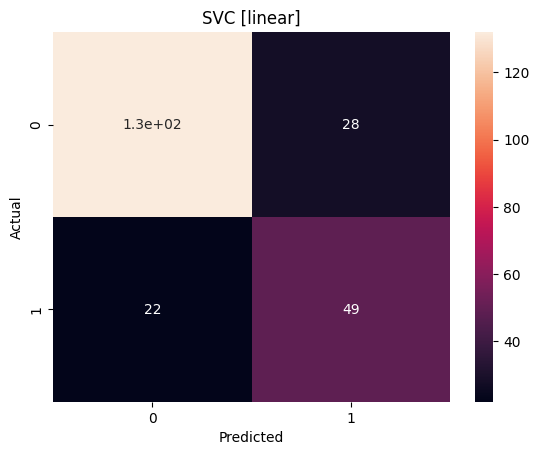

In [ ]:
conf_mat = pd.crosstab(y_test, svc_prediction, rownames=['Actual'], colnames = ['Predicted'])
sns.heatmap(conf_mat, annot=True).set(title='SVC [linear]')